In [81]:
import pandas as pd # 
import numpy as np #
import matplotlib.pyplot as plt
import pandas_profiling as pp # for profiling dataset
import datetime
import tensorflow_data_validation as tfdv
import seaborn as sns

# data gathering

train_df = pd.read_csv("expedia-hotel-ranking-exercise/train.csv")
test_df = pd.read_csv("expedia-hotel-ranking-exercise/test.csv")

In [2]:
# check num of rows and columns
train_df.shape

(841115, 47)

In [73]:
train_df.dtypes

srch_id                              int64  
prop_key                             int64  
srch_date_time                       object 
srch_visitor_id                      object 
srch_visitor_visit_nbr               int64  
srch_visitor_loc_country             object 
srch_visitor_loc_region              object 
srch_visitor_loc_city                object 
srch_visitor_wr_member               object 
srch_posa_continent                  object 
srch_posa_country                    object 
srch_hcom_destination_id             int64  
srch_dest_longitude                  float64
srch_dest_latitude                   float64
srch_ci                              object 
srch_co                              object 
srch_ci_day                          int64  
srch_co_day                          int64  
srch_los                             int64  
srch_bw                              int64  
srch_adults_cnt                      float64
srch_children_cnt                    float64
srch_rm_cn

In [3]:
# data profiling with pandas_profiling
train_profile = pp.ProfileReport(train_df,title = "Train DS", explorative = True) 



In [4]:
# train_profile.to_widgets()

In [5]:
# train_profile.to_notebook_iframe()

In [6]:
# generate stats for train ds using tfdv
train_stats = tfdv.generate_statistics_from_dataframe(dataframe=train_df)
tfdv.visualize_statistics(train_stats)

In [7]:
# infer train schema to use for comparison
schema = tfdv.infer_schema(statistics=train_stats)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'srch_id',INT,required,,-
'prop_key',INT,required,,-
'srch_date_time',BYTES,required,,-
'srch_visitor_id',BYTES,required,,-
'srch_visitor_visit_nbr',INT,required,,-
'srch_visitor_loc_country',BYTES,required,,-
'srch_visitor_loc_region',BYTES,optional,single,-
'srch_visitor_loc_city',BYTES,required,,-
'srch_visitor_wr_member',STRING,optional,single,'srch_visitor_wr_member'


/opt/anaconda3/lib/python3.7/site-packages/tensorflow_data_validation/utils/display_util.py:138: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Values
Domain,
'srch_visitor_wr_member',"'Not Signed In|New Visitor|Not FC Member', 'Not Signed In|Returning Visitor|Not FC Member', 'Signed In|Not WR Member|Not FC Member', 'Signed In|WR Member|FC Member', 'Signed In|WR Member|Not FC Member', 'Signed in - Persistent|Not WR Member|Not FC Member', 'Signed in - Persistent|Not WR Member|Remembered FC Member', 'Signed in - Persistent|WR Member|Not FC Member', 'Signed in - Persistent|WR Member|Remembered FC Member'"
'srch_posa_continent',"'ASIA', 'EUROPE', 'LATAM', 'OCEANIA'"
'srch_posa_country',"'ARABIC', 'ARGENTINA', 'ASIA', 'AUSTRALIA', 'AUSTRIA', 'BELGIUM', 'BOLIVIA', 'BRAZIL', 'CANADA', 'CHILE', 'CHINA', 'COLOMBIA', 'COSTA RICA', 'CROATIA', 'CZECH', 'DENMARK', 'ECUADOR', 'EL SALVADOR', 'EMEA', 'ESTONIA', 'FINLAND', 'FRANCE', 'GERMANY', 'GREECE', 'GUATEMALA', 'HONDURAS', 'HONG KONG', 'HUNGARY', 'ICELAND', 'INDIA', 'INDONESIA', 'IRELAND', 'ISRAEL', 'ISRAEL HEBREW', 'ITALY', 'JAPAN', 'LATVIA', 'MALAYSIA', 'MEXICO', 'NETHERLANDS', 'NEW ZEALAND', 'NICARAGUA', 'NORWAY', 'PANAMA', 'PARAGUAY', 'PERU', 'PHILIPPINES', 'POLAND', 'PORTUGAL', 'RUSSIA', 'SINGAPORE', 'SLOVAKIA', 'SOUTH AFRICA', 'SOUTH KOREA', 'SPAIN & CANARY ISLANDS', 'SURINAME', 'SWEDEN', 'SWITZERLAND', 'TAIWAN, REPUBLIC OF CHINA', 'THAILAND', 'TURKEY', 'UNITED KINGDOM', 'UNKNOWN', 'URUGUAY', 'US', 'VENEZUELA', 'VIETNAM'"
'srch_device',"'DESKTOP', 'TABWEB', 'WEB'"
'srch_currency',"'AED', 'ARS', 'AUD', 'BOB', 'BRL', 'CAD', 'CHF', 'CLP', 'CNY', 'COP', 'CRC', 'CZK', 'DKK', 'EGP', 'EUR', 'GBP', 'GTQ', 'HKD', 'HNL', 'HRK', 'HUF', 'IDR', 'ILS', 'INR', 'ISK', 'JPY', 'KRW', 'KWD', 'MAD', 'MOP', 'MXN', 'MYR', 'NOK', 'NZD', 'OMR', 'PAB', 'PEN', 'PHP', 'PLN', 'RUB', 'SAR', 'SEK', 'SGD', 'THB', 'TND', 'TRY', 'TWD', 'USD', 'UYU', 'VND', 'ZAR'"
'prop_super_region',"'AMER', 'APAC', 'EMEA', 'LATAM'"
'prop_continent',"'ASIA', 'EUROPE', 'LATAM', 'NORTHAMERICA'"
'prop_country',"'FRANCE', 'ITALY', 'JAPAN', 'MARTINIQUE', 'SOUTH KOREA', 'UNITED KINGDOM', 'UNITED STATES OF AMERICA'"
'srch_local_date',"'2014-08-31', '2014-09-01', '2014-09-02', '2014-09-03', '2014-09-04', '2014-09-05', '2014-09-06', '2014-09-07', '2014-09-08', '2014-09-09', '2014-09-10', '2014-09-11', '2014-09-12', '2014-09-13', '2014-09-14', '2014-09-15', '2014-09-16', '2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26', '2014-09-27'"


In [8]:
# generate stats for test ds using tfdv
test_stats = tfdv.generate_statistics_from_dataframe(dataframe=test_df)
tfdv.visualize_statistics(test_stats)

In [9]:
# Compare evaluation data with training data
tfdv.visualize_statistics(lhs_statistics=test_stats, rhs_statistics=train_stats,
                          lhs_name='TEST_DATASET', rhs_name='TRAIN_DATASET')

In [10]:
anomalies = tfdv.validate_statistics(statistics=test_stats, schema=schema)
tfdv.display_anomalies(anomalies)

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_data_validation/utils/display_util.py:173: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Anomaly short description,Anomaly long description
Feature name,,
'srch_adults_cnt',Expected data of type: FLOAT but got INT,
'srch_children_cnt',Expected data of type: FLOAT but got INT,
'srch_posa_country',Unexpected string values,"Examples contain values missing from the schema: FRENCH GUIANA (<1%), LITHUANIA (<1%)."
'prop_booking_bool',Column dropped,Column is completely missing
'srch_currency',Unexpected string values,Examples contain values missing from the schema: LTL (<1%).
'prop_country',Unexpected string values,Examples contain values missing from the schema: SWITZERLAND (<1%).


In [12]:
# observations from profiling:

# srch_mobile_app: constant with zero, no one used mobile app
# srch_visitor_loc_region has few missing values
# srch_visitor_wr_member has high missing values
# srch_posa_continent has high missing values
# srch_adults_count and children_count has 18 missing values each
# srch_bw has 68898 zeros, 8.2% booked same day as search date
# srch_children_count has 760192 zero, 90.4% of searchers didn't include children in the booking
# srch_currency has high number of missing values
# prop_price_without_dsct_usd is skewed, has few missing values 51, two zeros , prop_price colums are skewed
# prop_startratings has 10593 zeros, 1.3% rated zero
# prop_review_score has 8 missing values, 5809 zeros, 0.7% scored 0
# prop_price_with_discount_local is highly correlated with prop_price_without_discount_local

# prop_market_id is highly correlated with srch_hcom_destination_id *

# srch_local_date is similar info as srch_date_time

# srch city,country,region

# srch_posa_country is highly correlated with srch_posa_continent 
# srch_continent is highly correlated with srch_posa_country and srch_currency
# srch_currency is highly correlated with srch_posa_continent

# prop_continent is highly correlated with prop_super_region and prop_country

# prop_room_capacity has -ve values -9998 and 1770 zeros



In [13]:
# train_df.columns

In [14]:
# based on profiling, these columns are dropped
# srch_mobile_app: constant with zero, no one used mobile app
# prop_price_with_discount_local: highly correlated with prop_price_without_discount_local 
# prop_market_id because it's highly correlated with srch_hcom_destination_id
# srch_local_date because srch_local_date time has the same info
# srch_posa_country because it is highly correlated with srch_posa continent
# srch_visitor_wr_member has high missing values over 50%
# srch_posa_continent has high missing values over 50%
# srch_visitor_loc_region because srch_visitor_destination id covers it and has few missing values
# srch_currency has over 15% missing values and currency has been converted to USD and can be gotten from country
# prop_continent and prop_super_region dropped because they are highly correlated with prop_country
# prop_price_with_discount_usd is correlated with prop_price_without_discount_usd
# prop_market_id is correlated with srch_hcom_destination_id
# srch_children_count beacause it has too many zeros?

# srch_ci and srch_co since los is available
# srch_date_time, local date, srch_visitor_id can be seen from srch_id
# dropped longitude and latitude
# dropped srch devices



In [ ]:
corrmat = train_df.corr()
top_corr_feat = corrmat.index
plt.figure(figsize=(40,40))
g=sns.heatmap(train_df[top_corr_feat].corr(),annot=True,cmap="RdYlGn")

In [82]:
# drop columns that were observed as redundant, high missing values, constants
train_df = train_df.drop(['prop_price_with_discount_usd','prop_price_with_discount_local',
                              'prop_price_without_discount_local', 'prop_market_id', 'prop_super_region', 
                              'prop_continent','srch_visitor_loc_region','srch_currency','srch_dest_longitude','srch_dest_latitude',
                          'srch_posa_country','srch_local_date','srch_ci','srch_co','srch_ci_day','srch_co_day','srch_date_time',
                          'srch_visitor_loc_country','srch_visitor_loc_city','srch_device','srch_visitor_wr_member','srch_posa_continent',
                          'srch_visitor_id','prop_country'
                    
                         ], axis=1)

In [83]:
train_df

,srch_id,prop_key,srch_visitor_visit_nbr,srch_hcom_destination_id,srch_los,srch_bw,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_mobile_bool,...,prop_price_without_discount_usd,prop_imp_drr,prop_booking_bool,prop_brand_bool,prop_starrating,prop_submarket_id,prop_room_capacity,prop_review_score,prop_review_count,prop_hostel_bool
0,-1046322713,257690,5,728660,3,164,2.0,0.0,1,0,...,186.72,0,0,1,3.5,109140,575,4.1,403.0,0
1,-1046322713,3066218,5,728660,3,164,2.0,0.0,1,0,...,153.71,1,0,0,3.0,109140,339,3.6,101.0,0
2,-1046322713,2271987,5,728660,3,164,2.0,0.0,1,0,...,467.25,0,0,1,3.5,109140,179,4.1,1189.0,0
3,-1046322713,3308025,5,728660,3,164,2.0,0.0,1,0,...,476.65,0,0,1,5.0,98278,272,4.8,221.0,0
4,-1046322713,3222046,5,728660,3,164,2.0,0.0,1,0,...,181.39,0,0,0,3.0,109140,198,3.9,702.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841110,964783409,249748,5,1506246,2,1,2.0,0.0,1,0,...,334.00,1,0,1,4.0,85868,251,4.1,1928.0,0
841111,964783409,255778,5,1506246,2,1,2.0,0.0,1,0,...,649.00,0,0,1,4.0,96809,712,4.2,605.0,0
841112,964783409,244678,5,1506246,2,1,2.0,0.0,1,0,...,285.00,0,0,0,3.0,96809,369,4.0,5305.0,0
841113,964783409,259221,5,1506246,2,1,2.0,0.0,1,0,...,559.00,0,0,1,4.0,96812,770,4.2,1809.0,0


In [84]:
# other columns with few missing values
train_df.dropna(inplace=True)
train_df

,srch_id,prop_key,srch_visitor_visit_nbr,srch_hcom_destination_id,srch_los,srch_bw,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_mobile_bool,...,prop_price_without_discount_usd,prop_imp_drr,prop_booking_bool,prop_brand_bool,prop_starrating,prop_submarket_id,prop_room_capacity,prop_review_score,prop_review_count,prop_hostel_bool
0,-1046322713,257690,5,728660,3,164,2.0,0.0,1,0,...,186.72,0,0,1,3.5,109140,575,4.1,403.0,0
1,-1046322713,3066218,5,728660,3,164,2.0,0.0,1,0,...,153.71,1,0,0,3.0,109140,339,3.6,101.0,0
2,-1046322713,2271987,5,728660,3,164,2.0,0.0,1,0,...,467.25,0,0,1,3.5,109140,179,4.1,1189.0,0
3,-1046322713,3308025,5,728660,3,164,2.0,0.0,1,0,...,476.65,0,0,1,5.0,98278,272,4.8,221.0,0
4,-1046322713,3222046,5,728660,3,164,2.0,0.0,1,0,...,181.39,0,0,0,3.0,109140,198,3.9,702.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841110,964783409,249748,5,1506246,2,1,2.0,0.0,1,0,...,334.00,1,0,1,4.0,85868,251,4.1,1928.0,0
841111,964783409,255778,5,1506246,2,1,2.0,0.0,1,0,...,649.00,0,0,1,4.0,96809,712,4.2,605.0,0
841112,964783409,244678,5,1506246,2,1,2.0,0.0,1,0,...,285.00,0,0,0,3.0,96809,369,4.0,5305.0,0
841113,964783409,259221,5,1506246,2,1,2.0,0.0,1,0,...,559.00,0,0,1,4.0,96812,770,4.2,1809.0,0


In [85]:
# from data validation
# srch_adults_cnt and srch_children_cnt should be integers
train_df['srch_adults_cnt'] = train_df['srch_adults_cnt'].astype(int)
train_df['srch_children_cnt'] = train_df['srch_children_cnt'].astype(int)


In [86]:
train_df.dtypes

srch_id                            int64  
prop_key                           int64  
srch_visitor_visit_nbr             int64  
srch_hcom_destination_id           int64  
srch_los                           int64  
srch_bw                            int64  
srch_adults_cnt                    int64  
srch_children_cnt                  int64  
srch_rm_cnt                        int64  
srch_mobile_bool                   int64  
srch_mobile_app                    int64  
prop_travelad_bool                 int64  
prop_dotd_bool                     int64  
prop_price_without_discount_usd    float64
prop_imp_drr                       int64  
prop_booking_bool                  int64  
prop_brand_bool                    int64  
prop_starrating                    float64
prop_submarket_id                  int64  
prop_room_capacity                 int64  
prop_review_score                  float64
prop_review_count                  float64
prop_hostel_bool                   int64  
dtype: obje

In [88]:
# check value count of target label
train_df['prop_booking_bool'].value_counts()

0    817029
1    24009 
Name: prop_booking_bool, dtype: int64

In [89]:
# to deal with inbalance of target label/data

book_index_0, book_index_1 =train2_df['prop_booking_bool'].value_counts()

book_0=train2_df[train2_df['prop_booking_bool']==0]
book_1=train2_df[train2_df['prop_booking_bool']==1]

book_0_sample=book_0.sample(book_index_1 )

train2_df=pd.concat([book_0_sample,book_1])



In [140]:
train2_df.shape

(48018, 21)

In [91]:
test_df.dropna(inplace=True)

In [92]:
train2_df.isnull().any()

srch_id                            False
srch_visitor_visit_nbr             False
srch_los                           False
srch_bw                            False
srch_adults_cnt                    False
srch_children_cnt                  False
srch_rm_cnt                        False
srch_mobile_bool                   False
prop_travelad_bool                 False
prop_dotd_bool                     False
prop_price_without_discount_usd    False
prop_price_with_discount_usd       False
prop_imp_drr                       False
prop_brand_bool                    False
prop_starrating                    False
prop_submarket_id                  False
prop_room_capacity                 False
prop_review_score                  False
prop_review_count                  False
prop_hostel_bool                   False
prop_booking_bool                  False
dtype: bool

In [93]:
train2_df.dtypes

srch_id                            int64  
srch_visitor_visit_nbr             int64  
srch_los                           int64  
srch_bw                            int64  
srch_adults_cnt                    int64  
srch_children_cnt                  int64  
srch_rm_cnt                        int64  
srch_mobile_bool                   int64  
prop_travelad_bool                 int64  
prop_dotd_bool                     int64  
prop_price_without_discount_usd    float64
prop_price_with_discount_usd       float64
prop_imp_drr                       int64  
prop_brand_bool                    int64  
prop_starrating                    float64
prop_submarket_id                  int64  
prop_room_capacity                 int64  
prop_review_score                  float64
prop_review_count                  float64
prop_hostel_bool                   int64  
prop_booking_bool                  int64  
dtype: object

In [94]:
(train2_df < 0).any().any()

True

In [95]:
(train2_df<0).any()

srch_id                            False
srch_visitor_visit_nbr             False
srch_los                           False
srch_bw                            False
srch_adults_cnt                    False
srch_children_cnt                  False
srch_rm_cnt                        False
srch_mobile_bool                   False
prop_travelad_bool                 False
prop_dotd_bool                     False
prop_price_without_discount_usd    False
prop_price_with_discount_usd       False
prop_imp_drr                       False
prop_brand_bool                    False
prop_starrating                    False
prop_submarket_id                  False
prop_room_capacity                 True 
prop_review_score                  False
prop_review_count                  False
prop_hostel_bool                   False
prop_booking_bool                  False
dtype: bool

In [96]:
# -ve value in room cap
train2_df['prop_room_capacity'] = train2_df['prop_room_capacity'].abs()

In [97]:

test_df['prop_room_capacity'] = test_df['prop_room_capacity'].abs()

In [98]:
train2_df

,srch_id,srch_visitor_visit_nbr,srch_los,srch_bw,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_mobile_bool,prop_travelad_bool,prop_dotd_bool,...,prop_price_with_discount_usd,prop_imp_drr,prop_brand_bool,prop_starrating,prop_submarket_id,prop_room_capacity,prop_review_score,prop_review_count,prop_hostel_bool,prop_booking_bool
169931,1360959057,4,4,39,2,0,1,0,0,0,...,338.95,0,1,5.0,110287,2611,4.7,3411.0,0,0
801534,1396998217,1,2,6,1,0,1,0,0,0,...,483.93,0,1,4.0,96809,1311,4.2,3507.0,0,0
451604,1533836850,1,1,158,2,0,1,0,0,0,...,199.01,0,1,5.0,109090,2400,4.5,5689.0,0,0
438884,1325519273,53,4,146,1,1,1,0,0,0,...,88.86,0,0,2.5,110029,155,4.5,258.0,0,0
547078,465805413,5,1,0,1,0,1,1,0,0,...,279.00,0,1,4.0,96809,1311,4.2,3557.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840880,842522777,3,1,12,2,0,1,0,0,0,...,259.00,0,1,4.0,115077,184,4.4,991.0,0,1
840940,873939450,3,1,7,1,0,1,0,0,0,...,74.50,0,0,3.0,108054,36,3.6,54.0,0,1
840983,922160717,1,3,6,2,0,1,0,0,0,...,399.00,0,1,4.0,96812,804,3.6,2755.0,0,1
841017,932254906,8,1,8,1,0,1,0,0,0,...,169.14,0,1,4.0,108034,210,4.3,291.0,0,1


In [99]:
# set X and Y for feature importance and model training

X = train2_df.loc[:,train2_df.columns !='prop_booking_bool']
y = train2_df.loc[:, train2_df.columns == 'prop_booking_bool']


In [100]:
X

,srch_id,srch_visitor_visit_nbr,srch_los,srch_bw,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_mobile_bool,prop_travelad_bool,prop_dotd_bool,prop_price_without_discount_usd,prop_price_with_discount_usd,prop_imp_drr,prop_brand_bool,prop_starrating,prop_submarket_id,prop_room_capacity,prop_review_score,prop_review_count,prop_hostel_bool
169931,1360959057,4,4,39,2,0,1,0,0,0,497.61,338.95,0,1,5.0,110287,2611,4.7,3411.0,0
801534,1396998217,1,2,6,1,0,1,0,0,0,793.90,483.93,0,1,4.0,96809,1311,4.2,3507.0,0
451604,1533836850,1,1,158,2,0,1,0,0,0,399.98,199.01,0,1,5.0,109090,2400,4.5,5689.0,0
438884,1325519273,53,4,146,1,1,1,0,0,0,145.02,88.86,0,0,2.5,110029,155,4.5,258.0,0
547078,465805413,5,1,0,1,0,1,1,0,0,622.00,279.00,0,1,4.0,96809,1311,4.2,3557.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840880,842522777,3,1,12,2,0,1,0,0,0,429.00,259.00,0,1,4.0,115077,184,4.4,991.0,0
840940,873939450,3,1,7,1,0,1,0,0,0,244.24,74.50,0,0,3.0,108054,36,3.6,54.0,0
840983,922160717,1,3,6,2,0,1,0,0,0,469.00,399.00,0,1,4.0,96812,804,3.6,2755.0,0
841017,932254906,8,1,8,1,0,1,0,0,0,808.63,169.14,0,1,4.0,108034,210,4.3,291.0,0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.09738554 0.08814714 0.06993923 0.09844945 0.04762853 0.01764647
 0.01525123 0.0058801  0.00295285 0.00679439 0.09630316 0.10640205
 0.00800269 0.00587448 0.03640952 0.0555235  0.06686158 0.05880416
 0.11502317 0.00072076]


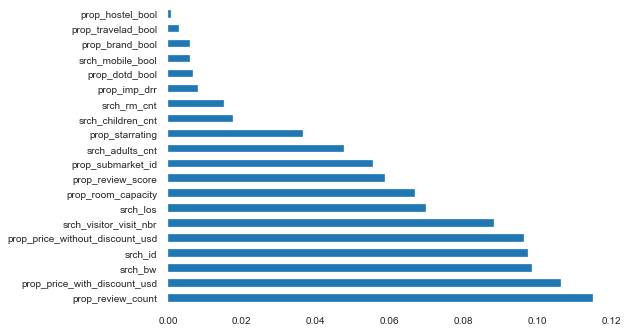

In [102]:
# feature importance to get the score of each feature

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

In [104]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.47570201, -0.26615718,  0.61143989, ...,  1.3073007 ,
         0.23014747, -0.05653751],
       [ 0.53407152, -0.36706864, -0.3031059 , ...,  0.35128357,
         0.25712848, -0.05653751],
       [ 0.75569721, -0.36706864, -0.76037879, ...,  0.92489385,
         0.87038446, -0.05653751],
       ...,
       [-0.23498169, -0.36706864,  0.154167  , ..., -0.79593697,
         0.0457772 , -0.05653751],
       [-0.21863301, -0.13160857, -0.76037879, ...,  0.542487  ,
        -0.64673551, -0.05653751],
       [-0.16594941, -0.23252003, -0.3031059 , ...,  0.35128357,
         0.54352071, -0.05653751]])

In [105]:
pca = PCA(n_components=20)
pca.fit(X)

PCA(n_components=20)

In [106]:
variance =np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
variance

array([ 9.63, 18.95, 27.65, 36.27, 42.63, 48.01, 53.26, 58.29, 63.29,
       68.21, 73.06, 77.79, 82.15, 86.28, 90.17, 93.7 , 96.06, 98.01,
       99.56, 99.99])

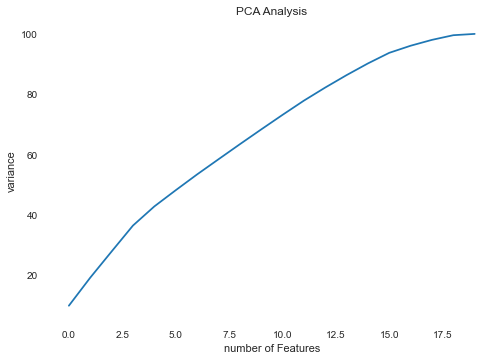

In [108]:
plt.ylabel('variance')
plt.xlabel('number of Features')
plt.title('PCA Analysis')
plt.plot(variance)

In [ ]:
# keeping all features based on results

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape

(33612, 20)

In [110]:
# random classifier model

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy', accuracy_score(y_test, y_pred))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[5219 2009]
 [4367 2811]]
Accuracy 0.5574066361238373


In [53]:
X_test

array([[ 0.16443384, -0.26615718,  4.72689592, ..., -0.2223267 ,
        -0.55820406, -0.05653751],
       [ 1.51950284,  7.43675096, -0.3031059 , ..., -0.03112327,
         1.05897051, -0.05653751],
       [ 0.421376  , -0.33343149,  0.154167  , ..., -0.03112327,
        -0.33842121, -0.05653751],
       ...,
       [ 0.6243663 , -0.36706864, -0.3031059 , ...,  0.542487  ,
        -0.65404287, -0.05653751],
       [-0.7055802 , -0.36706864, -0.76037879, ...,  0.92489385,
         0.1340276 , -0.05653751],
       [ 0.57358758, -0.33343149, -0.76037879, ...,  0.542487  ,
        -0.6321208 , -0.05653751]])

In [54]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [117]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy', accuracy_score(y_test, y_pred))

[[5143 2093]
 [4200 2970]]
Accuracy 0.5631681243926142


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.71      0.62      7236
           1       0.59      0.41      0.49      7170

    accuracy                           0.56     14406
   macro avg       0.57      0.56      0.55     14406
weighted avg       0.57      0.56      0.55     14406



In [144]:
train2_df.dtypes

srch_id                            int64  
srch_visitor_visit_nbr             int64  
srch_los                           int64  
srch_bw                            int64  
srch_adults_cnt                    int64  
srch_children_cnt                  int64  
srch_rm_cnt                        int64  
srch_mobile_bool                   int64  
prop_travelad_bool                 int64  
prop_dotd_bool                     int64  
prop_price_without_discount_usd    float64
prop_price_with_discount_usd       float64
prop_imp_drr                       int64  
prop_brand_bool                    int64  
prop_starrating                    float64
prop_submarket_id                  int64  
prop_room_capacity                 int64  
prop_review_score                  float64
prop_review_count                  float64
prop_hostel_bool                   int64  
prop_booking_bool                  int64  
dtype: object

In [124]:
train_data=train2_df.iloc[:,0:20]
train_data

,srch_id,srch_visitor_visit_nbr,srch_los,srch_bw,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_mobile_bool,prop_travelad_bool,prop_dotd_bool,prop_price_without_discount_usd,prop_price_with_discount_usd,prop_imp_drr,prop_brand_bool,prop_starrating,prop_submarket_id,prop_room_capacity,prop_review_score,prop_review_count,prop_hostel_bool
169931,1360959057,4,4,39,2,0,1,0,0,0,497.61,338.95,0,1,5.0,110287,2611,4.7,3411.0,0
801534,1396998217,1,2,6,1,0,1,0,0,0,793.90,483.93,0,1,4.0,96809,1311,4.2,3507.0,0
451604,1533836850,1,1,158,2,0,1,0,0,0,399.98,199.01,0,1,5.0,109090,2400,4.5,5689.0,0
438884,1325519273,53,4,146,1,1,1,0,0,0,145.02,88.86,0,0,2.5,110029,155,4.5,258.0,0
547078,465805413,5,1,0,1,0,1,1,0,0,622.00,279.00,0,1,4.0,96809,1311,4.2,3557.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840880,842522777,3,1,12,2,0,1,0,0,0,429.00,259.00,0,1,4.0,115077,184,4.4,991.0,0
840940,873939450,3,1,7,1,0,1,0,0,0,244.24,74.50,0,0,3.0,108054,36,3.6,54.0,0
840983,922160717,1,3,6,2,0,1,0,0,0,469.00,399.00,0,1,4.0,96812,804,3.6,2755.0,0
841017,932254906,8,1,8,1,0,1,0,0,0,808.63,169.14,0,1,4.0,108034,210,4.3,291.0,0


In [125]:
# update test_data with train_data prep
test_data=pd.DataFrame(columns=train_data.columns)
for column in test_data.columns:
    if column in test_df.columns:
        test_data[column]=test_df[column]
    else:
        test_data[column]=None
        

In [126]:
test_data

,srch_id,srch_visitor_visit_nbr,srch_los,srch_bw,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_mobile_bool,prop_travelad_bool,prop_dotd_bool,prop_price_without_discount_usd,prop_price_with_discount_usd,prop_imp_drr,prop_brand_bool,prop_starrating,prop_submarket_id,prop_room_capacity,prop_review_score,prop_review_count,prop_hostel_bool
52,-1103475971,1,1,3,1,0,1,0,0,0,581.53,256.44,0,1,4.0,113583,101,3.9,329.0,0
53,-1103475971,1,1,3,1,0,1,0,0,0,247.38,227.95,1,0,3.0,112386,38,3.7,149.0,0
54,-1103475971,1,1,3,1,0,1,0,0,0,374.30,174.85,0,0,3.0,113583,52,3.9,457.0,0
55,-1103475971,1,1,3,1,0,1,0,0,0,164.49,155.42,1,0,3.0,114017,72,3.9,260.0,0
56,-1103475971,1,1,3,1,0,1,0,0,0,297.89,265.51,1,0,4.0,113091,38,3.7,133.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351519,8870239,20,9,75,1,0,1,0,0,0,186.48,116.55,0,0,0.0,112386,30,3.4,270.0,0
351520,8870239,20,9,75,1,0,1,0,0,0,123.03,104.90,1,0,2.0,113583,34,4.2,582.0,0
351521,8870239,20,9,75,1,0,1,0,0,0,270.66,110.08,0,0,3.0,112386,36,3.8,272.0,0
351522,8870239,20,9,75,1,0,1,0,0,0,110.08,80.29,1,0,0.0,113182,23,3.5,333.0,0


In [157]:
# prediction on test data
# Random Forest


rfc_pred =classifier.predict(scaler.fit_transform(test_data.iloc[:,0:]))




In [158]:
rfc_pred

array([1, 1, 1, ..., 0, 1, 0])

In [159]:
# Logistic Regression
lg_pred = logreg.predict(scaler.fit_transform(test_data.iloc[:,0:]))

In [160]:
lg_pred

array([0, 0, 0, ..., 0, 1, 0])

In [134]:
# compare results
y_pred  = pd.DataFrame(y_pred)
y_pred.value_counts()

0    9343
1    5063
dtype: int64

In [136]:
rfc_pred = pd.DataFrame(rfc_pred)
rfc_pred.value_counts()

1    46280
0    45465
dtype: int64

In [149]:
lg_pred = pd.DataFrame(lg_pred)
lg_pred.value_counts()


,0
0,0
1,0
2,0
3,0
4,0
...,...
91740,1
91741,1
91742,1
91743,1


In [143]:
test_data.dtypes

srch_id                            int64  
srch_visitor_visit_nbr             int64  
srch_los                           int64  
srch_bw                            int64  
srch_adults_cnt                    int64  
srch_children_cnt                  int64  
srch_rm_cnt                        int64  
srch_mobile_bool                   int64  
prop_travelad_bool                 int64  
prop_dotd_bool                     int64  
prop_price_without_discount_usd    float64
prop_price_with_discount_usd       float64
prop_imp_drr                       int64  
prop_brand_bool                    int64  
prop_starrating                    float64
prop_submarket_id                  int64  
prop_room_capacity                 int64  
prop_review_score                  float64
prop_review_count                  float64
prop_hostel_bool                   int64  
dtype: object

In [192]:


result1 = pd.DataFrame({'srch_id':test_data['srch_id'], 'prop_booking_bool':lg_pred})


In [185]:
result1

,srch_id,prop_booking_bool
52,-1103475971,0
53,-1103475971,0
54,-1103475971,0
55,-1103475971,0
56,-1103475971,0
...,...,...
351519,8870239,1
351520,8870239,1
351521,8870239,0
351522,8870239,1


In [ ]:
# creating lightgbm for 

In [153]:
import lightgbm as lgb
gbm = lgb.LGBMRanker()

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [155]:
query_train = [X_train.shape[0]]
query_val = [X_val.shape[0]]
query_test = [X_test.shape[0]]

In [188]:
gbm.fit(X_train, y_train, group=query_train,
        eval_set=[(X_val, y_val)], eval_group=[query_val],
        eval_at=[50], early_stopping_rounds = 1 )

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[1]	valid_0's ndcg@50: 0.644871
Training until validation scores don't improve for 1 rounds
[2]	valid_0's ndcg@50: 0.718366
[3]	valid_0's ndcg@50: 0.732655
[4]	valid_0's ndcg@50: 0.760087
[5]	valid_0's ndcg@50: 0.797159
[6]	valid_0's ndcg@50: 0.904474
[7]	valid_0's ndcg@50: 0.902812
Early stopping, best iteration is:
[6]	valid_0's ndcg@50: 0.904474


LGBMRanker()

In [189]:
y_pred= gbm.predict(X_test)

In [193]:
test_pred = gbm.predict(test_data)

In [194]:
result1["predicted_ranking"] = test_pred
result1.sort_values("predicted_ranking", ascending=False)

,srch_id,prop_booking_bool,predicted_ranking
37208,1609241265,0,0.535423
288132,1922316810,0,0.535423
71324,-1509686643,1,0.535423
280285,1190870514,0,0.535423
280286,1190870514,0,0.535423
...,...,...,...
173287,-697859079,0,-0.122606
143450,670505409,0,-0.123360
143439,670505409,0,-0.123360
20610,1241651346,0,-0.123360


In [195]:
result1.to_csv('submissions.csv')